# Module 01: Jupyter Notebook Assignment

## Due: 2021-09-03

## Name: Samantha Taylor

### Part I: Instructions

In this part of the assignment, your task is to create a one-dimensional random walk model similar to the one in [the example notebook](./mod01-PythonIntro-1.ipynb) with the following parameters:

* `Nt` = 200
* `mu_x` = 1.5
* `s_x` = 2.1
* `min_x` = 1.25

Where `min_x` is a new parameter that is the _minimum step size_ at each step in the random walk. When you calculate the step size at each step, you will only accept values that are larger than `min_x` by using a `while` loop to keep generating step sizes until the step size exceeds `min_x`. Do this for `Nx` = 1,000 random walkers. 

___Deliverables:___ 

1. Code to create the random walk with comments
2. Reproduce the 2 figures in section 5.1 and 5.2 of the example notebook (__Note__: you will have to adjust the `bins` and `range` parameters provided to histogram). 

In [26]:
import numpy as np # Needed to create numberical operations
import matplotlib.pyplot as plt # Needed to create plots

Nt = 200 # Number of steps in Random Walk (aka time step)
Nx = 1000 # Number of random walkers in Random Walk

mu_x = 1.5 # Average step size in Random Walk
s_x = 2.1 # Standard deviation of step size in Random Walk
min_x = 1.25 # Minimum step size at each step in Random Walk

# Now all parameters are defined. Time to create a container to store the positions of the random walkers

X = np.zeros((Nt,Nx)) # Array of zeros with Nt rows and Nx columns with each row corresponding to a specific time 
                      # step and each column to a specific walker
                     
# Create a loop for each time step
# Using a nested loop will run the outter loop's (i) first iterations, which triggers the inner nested loop (j) 
# to run to completion
# Program will then go back to outter loop and repeat process 200 times

for i in np.arange(Nt): # Outter loop

    for j in np.arange(Nx): # Inner nested loop
        
        x_i = 0 # Define step size to be less than minimum step size in order to create while loop
        
        while (x_i < min_x):
            x_i = s_x*np.random.randn() + mu_x 
            # Calculate the random step size for the j^th walker at the i^th time step
            # Creates a single random number with Random Walk parameters, i.e. mean = 0 and SD = 1
        if(i==0):
            X[i,j] = 0.0 + x_i 
            # Initial position of walker was 0. Add on random step size > 1.25 calculated with x_i
        else:
            X[i,j] = X[i-1,j] + x_i 
            # Position is now last position plus random step size > 1.25 calculated with x_i
            
# In order to reproduce Figure 5.1, new variables must be defined

mean_X = np.mean(X,axis=1)   # Mean distance random walkers have traveled in time
std_X = np.std(X,axis=1)     # Standard deviation of random walkers traveling in time

# Now ready to plot

### Plot Results of Random Walk (Reproduce Figure 5.1)

Text(0.5, 1.0, 'An Ensemble of 1D Random Walk')

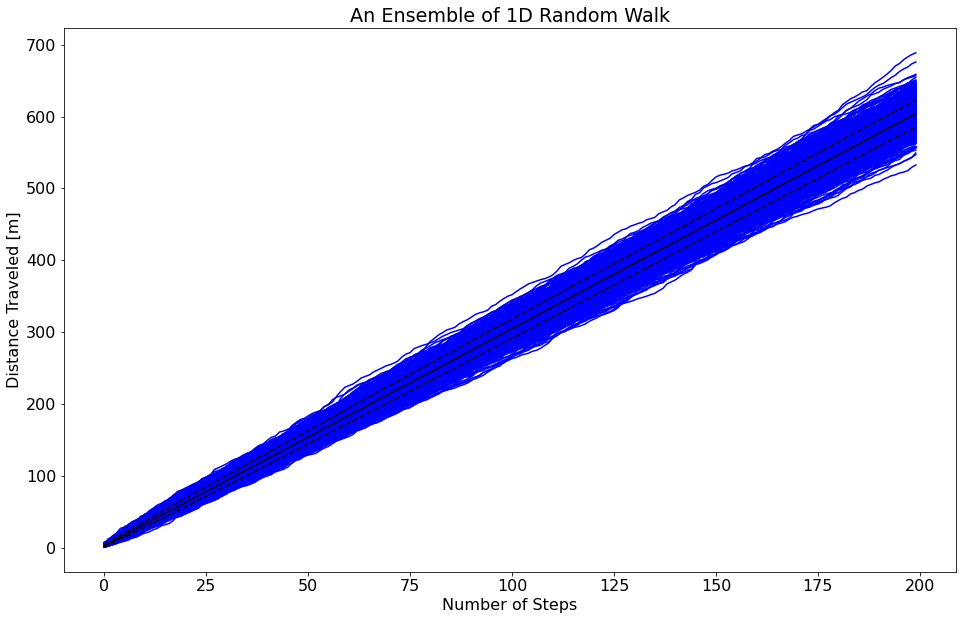

In [27]:
plt.rcParams.update({'font.size': 16}) # Sets all font size for figures to 16

plt.figure(figsize = (16,10)) # 16" wide by 10" tall new figure

plt.plot(np.arange(Nt),X,'b-')   # With blue lines, plot the location of all random walkers against time 
plt.plot(np.arange(Nt),mean_X,'k-')   # With a solid black line, plot the mean location of all random walkers 
plt.plot(np.arange(Nt),mean_X + std_X, 'k--')   # Plot the the standard deviation above the solid black mean line
plt.plot(np.arange(Nt),mean_X - std_X, 'k--')   # Plot the the standard deviation below the solid black mean line
plt.xlabel('Number of Steps') # X label for plot
plt.ylabel('Distance Traveled [m]') # Y label for plot
plt.title('An Ensemble of 1D Random Walk')

### Plot Results of Random Walk (Reproduce Figure 5.2)

Text(0.5, 0, 'Position [m]')

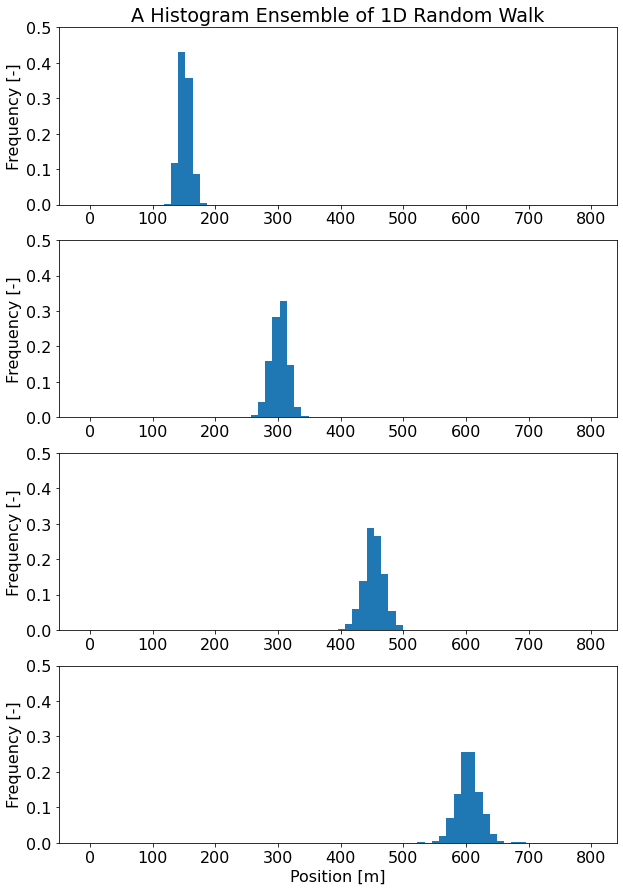

In [30]:
X_50, be_50 = np.histogram(X[49,:], bins=70, range=(-10.0,800)) 
# Create histogram with following parameters:
# array_like input data, with 70 bins i.e. number of equal widths in range, with x axis range going from -10 to 800
X_100, be_100 = np.histogram(X[99,:], bins=70, range=(-10.0,800))
X_150, be_150 = np.histogram(X[149,:], bins=70, range=(-10.0,800))
X_200, be_200 = np.histogram(X[-1,:], bins=70, range=(-10.0,800))

plt.figure(figsize = (10,15)) # 10" wide by 15" tall

plt.subplot(4,1,1) # Subplot 4 rows by 1 column and calls the first plot
plt.bar((be_50[1:]+be_50[:-1])/2, (X_50/np.sum(X_50)), width=(be_50[1]-be_50[0])) 
# Creates bar plot: first term is X, second term is height of plot, third term is width of plot
plt.ylim((0.0,0.5)) # Defines limits of Y axis
plt.ylabel('Frequency [-]') # Y label for plot
plt.title('A Histogram Ensemble of 1D Random Walk')

# Same definitions for other 3 plots

plt.subplot(4,1,2)
plt.bar((be_100[1:]+be_100[:-1])/2, (X_100/np.sum(X_100)), width=(be_100[1]-be_100[0]))
plt.ylim((0.0,0.5))
plt.ylabel('Frequency [-]')

plt.subplot(4,1,3)
plt.bar((be_150[1:]+be_150[:-1])/2, (X_150/np.sum(X_150)), width=(be_150[1]-be_150[0]))
plt.ylim((0.0,0.5))
plt.ylabel('Frequency [-]')

plt.subplot(4,1,4)
plt.bar((be_200[1:]+be_200[:-1])/2, (X_200/np.sum(X_150)), width=(be_200[1]-be_200[0]))
plt.ylim((0.0,0.5))
plt.ylabel('Frequency [-]')
plt.xlabel('Position [m]')

### Part II: Instructions

In this part of the assignment, your task is to create a __two-dimensional__ random walk model. The 2-D random walk is just an extension of the 1-D random walk into a second dimension. Assume that at each step in the random walk, the step size in the x- and y-directions are _independent_ of one another. That is, you do not need to know anything about the step size in the x-direction to calculate the step size in the y-direction and vice versa. Use the following parameters:

* Nt = 300
* Nx = 3
* mu_x = 0.5
* s_x = 1.5
* mu_y = 5.0
* s_y = 2.5

Where `mu_y` and `s_y` are, respectively, the average and standard deviation of the step size in the y-direction.

___Deliverables___

1. Code to create the random walk with comments
2. Plot the position of all three random walkers at each step of their respective random walks on the ___same plot___.

In [34]:
Nt = 300 # Number of time steps in Random Walk
Nx = 3 # Number of random walkers in Random Walk

mu_x = 0.5 # Step size in x direction
s_x = 1.5 # Standard deviation of step size in x direction
mu_y = 5.0 # Step size in y direction
s_y = 2.5 # Standard deviation of step size y direction

# Now all parameters are defined. Time to create a container to store the positions of the random walkers

# X DIRECTION
X = np.zeros((Nt,Nx)) # Array of zeros with Nt rows and Nx columns with each row corresponding to a specific time 
                      # step and each column to a specific walker
    
# Create a loop for each time step in the x direction
# Using a nested loop will run the outter loop's (i) first iterations, which triggers the inner nested loop (j) 
# to run to completion
# Program will then go back to outter loop and repeat process 300 times

for i in np.arange(Nt): # Outter loop

    for j in np.arange(Nx): # Inner nested loop
        
        x_i = s_x*np.random.randn() + mu_x # Step size for the j^th walker at the i^th time step
        
        if(i==0):
            X[i,j] = 0.0 + x_i # Initial position of walker was 0. Add on random step size calculated with x_i
        else:
            X[i,j] = X[i-1,j] + x_i # Position is now last position plus random step size calculated with x_i
            
# Y DIRECTION
Y = np.zeros((Nt,Nx)) # Array of zeros with Nt rows and Nx columns with each row corresponding to a specific time 
                      # step and each column to a specific walker

for i in np.arange(Nt): # Outter loop

    for j in np.arange(Nx): # Inner nested loop
        
        y_i = s_y*np.random.randn() + mu_y # Step size for the j^th walker at the i^th time step
        
        if(i==0):
            Y[i,j] = 0.0 + y_i # Initial position of walker was 0. Add on random step size calculated with y_i
        else:
            Y[i,j] = Y[i-1,j] + y_i # Position is now last position plus random step size calculated with y_i
            
# Now ready to plot

### Plot Results of 2D Random Walk Model

Text(0.5, 1.0, 'An Ensemble of 2D Random Walk')

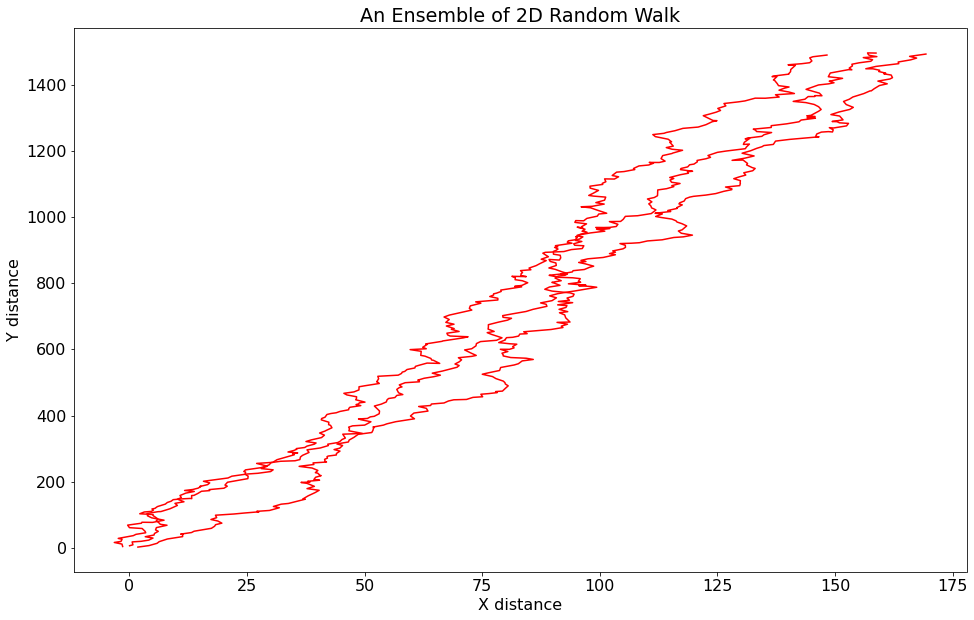

In [35]:
plt.rcParams.update({'font.size': 16}) # Sets all font size for figures to 16

plt.figure(figsize = (16,10)) # 16" wide by 10" tall new figure
plt.plot(X,Y,'r-')   # With red lines, plot the 3 Random Walks
plt.xlabel('X distance') # X label for plot
plt.ylabel('Y distance') # Y label for plot
plt.title('An Ensemble of 2D Random Walk')